# Diagrammatic Differentiation
**for Quantum Machine Learning**

[arXiv:2103.07960](https://arxiv.org/abs/2103.07960)

_Alexis Toumi_$^{\dagger\star}$,
Richie Yeung$^\star$,
Giovanni de Felice$^{\dagger\star}$

$^\dagger$ University of Oxford
$\quad^\star$ Cambridge Quantum Computing Ltd.

**Contents:**

1. Dual numbers
2. Dual diagrams
3. Differentiating ZX
4. Differentiating quantum circuits
5. Bubbles and the chain rule
6. Demo time! (if time permits)

## Dual numbers

Dual numbers were first introduced by

*  Clifford, _A Preliminary Sketch of Biquaternions_ (1873)

**Definition:**  A commutative rig (i.e. a riNg without Negatives) is a set $\mathbb{S}$ with two commutative monoids $(+, 0)$ and $(\times, 1)$ such that:

$$(a + b) \times c = a \times c + b \times c
\qquad \text{and} \qquad
a \times (c + d) = a \times c + a \times d$$

for all $a, b, c, d \in \mathbb{S}$.

**Intuition:** Rigs are the minimum structure with which we can define matrix multiplication. It's also the minimum we need for dual numbers.

**Examples:**
* $\mathbb{N} \hookrightarrow \mathbb{R}^+ \hookrightarrow \mathbb{R} \hookrightarrow \mathbb{C}$,
* the Booleans $\mathbb{B} = \{0, 1\}$ with disjunction and conjunction,
* the two-element field $\mathbb{F}_2 = \{0, 1\}$ with XOR and conjunction,
* functions $\mathbb{R}^n \to \mathbb{C}$ with pointwise addition and multiplication.

**Definition:**
Given a commutative rig $\mathbb{S}$, the dual numbers $\mathbb{D}[\mathbb{S}]$ has formal sums $s + s' \ \epsilon$ of scalars $s, s' \in \mathbb{S}$ as elements, with addition given pointwise:

$$(a + a' \ \epsilon ) + (b + b' \ \epsilon)
\quad = \quad (a + b) \enspace + \enspace(a + b') \ \epsilon$$

and multiplication given by the product rule:

$$(a + a' \ \epsilon ) \times (b + b' \ \epsilon)
\quad = \quad (a \times b) \enspace + \enspace (a \times b' \ + \ a' \times b) \ \epsilon$$

**Example:**
$\mathbb{D}[\mathbb{B}] = \{0, 1, \epsilon, 1 + \epsilon\}$

**Definition:** 
A derivation for a rig $\mathbb{S}$ is a sum-preserving map $\partial : \mathbb{S} \to \mathbb{S}$ which satisfies the Leibniz product rule:

$$\partial(f \times g) = f \times \partial(g) + \partial(f) \times g$$

for all $f, g \in \mathbb{S}$. The pair $(\mathbb{S}, \partial)$ is called a differential rig.

**Lemma:**
$\partial : \mathbb{S} \to \mathbb{S}$ is a derivation iff $f \mapsto f + \partial(f) \epsilon$ is a rig homomorphism $\mathbb{S} \to \mathbb{D}[\mathbb{S}]$.

**Lemma:**
Given a rig homomorphism $\partial : \mathbb{S} \to \mathbb{D}[\mathbb{S}]$ with $\pi_0 \circ \partial = \text{id}_\mathbb{S}$, projecting on the epsilon component yields a derivation
$\pi_1 \circ \partial : \mathbb{S} \to \mathbb{S}$.

**Examples:**
* Smooth functions $\mathbb{R}^n \to \mathbb{R}^m$ with the partial derivatives $\partial_i$ for $i < n$,
* Functions $\mathbb{F}_2^n \to \mathbb{F}_2^m$ with
$(\partial_i f)(\vec{x}) =
f(\vec{x}_{[x_i \mapsto 0]}) \oplus f(\vec{x}_{[x_i \mapsto 1]})$,
* Boolean formulae $\mathbb{B}_2^n \to \mathbb{B}_2^m$ with $\partial_i \phi = \neg \phi_{[x_i \mapsto 0]} \land \phi_{[x_i \mapsto 1]}$.

Dual numbers are a fundamental tool for **automatic differentiation**, see e.g.

* Hoffman, _A Hitchhiker's Guide to Automatic Differentiation_ ([arXiv:1411.0583](https://arxiv.org/abs/1411.0583))

**Intuition:** Given a function $f$ defined as a composition of elementary functions, we can compute $(\partial f)(a)$ by
evaluating $f(a + \epsilon)$ and projecting on the epsilon component.

## Dual diagrams

We generalise the dual number construction from rigs to monoidal categories with sums, i.e. enriched in commutative monoids.

**Definition:** A monoidal category $(\mathbf{C}, \otimes, 1)$ is enriched in commutative monoids when it has commutative monoids on each homset $(+) : \prod_{x,y}
\mathbf{C}(x, y) \times \mathbf{C}(x, y) \to \mathbf{C}(x, y)$
with unit $0 \in \prod_{x,y} \mathbf{C}(x, y)$
such that composition and tensor distribute over the sum.

**Examples:**
* a commutative rig is a monoid-enriched monoidal category with one object,
* the category $\mathbf{Mat}_\mathbb{S}$ of matrices valued in a commutative rig $\mathbb{S}$ with Kronecker product as tensor and entrywise sum,
* the free monoidal category with sums $\mathbf{C}_\Sigma^+$ generated by a monoidal signature $\Sigma$: arrows are formal sums of diagrams.

**Definition:** Given $\mathbf{C}$ a monoidal category with sums, we define $\mathbb{D}[\mathbf{C}]$ by adjoining a scalar $\epsilon$ and quotienting by $\epsilon \otimes \epsilon = 0$.

Concretely, the objects of $\mathbb{D}[\mathbf{C}]$ are the same as those of $\mathbf{C}$, the arrows
are given by formal sums $f + f' \epsilon$ of parallel arrows $f, f' \in \mathbf{C}$.
Composition and tensor are both given by the product rule.

**Note:** When $\mathbf{C}$ is not symmetric monoidal (or at least braided) we also need the axiom $\epsilon \otimes f = f \otimes \epsilon$ for all $f \in \mathbf{C}$.

**Definition:** A derivation is a unary operator on homsets $\partial : \prod_{x,y} \mathbf{C}(x, y) \to \mathbf{C}(x, y)$ that satisfies the product rules for both composition and tensor.

**Lemma:** $\partial$ is a derivation iff $f \mapsto f + (\partial f) \epsilon$ is a sum-preserving monoidal functor $\mathbf{C} \to \mathbb{D}[\mathbf{C}]$.

**Lemma:** Given a sum-preserving monoidal functor
$\partial : \mathbf{C} \to \mathbb{D}[\mathbf{C}]$ such that
$\pi_0 \circ \partial = \text{id}_{\mathbf{C}}$, projecting on the epsilon component gives a derivation $\pi_1 \circ \partial$.

**Proposition:** Dual matrices are matrices of dual numbers, i.e.
$\mathbb{D}[\mathbf{Mat}_\mathbb{S}] \simeq \mathbf{Mat}_{\mathbb{D}[\mathbb{S}]}$.

**Proposition:** Derivations on $\mathbf{Mat}_\mathbb{S}$ are in one-to-one correspondance with derivations on $\mathbb{S}$.

**Definition:** The category of dual diagrams $\mathbb{D}[\mathbf{C}_\Sigma^+]$.

We depict the gradient $\partial d$ as a bubble surrounding the diagram $d$.

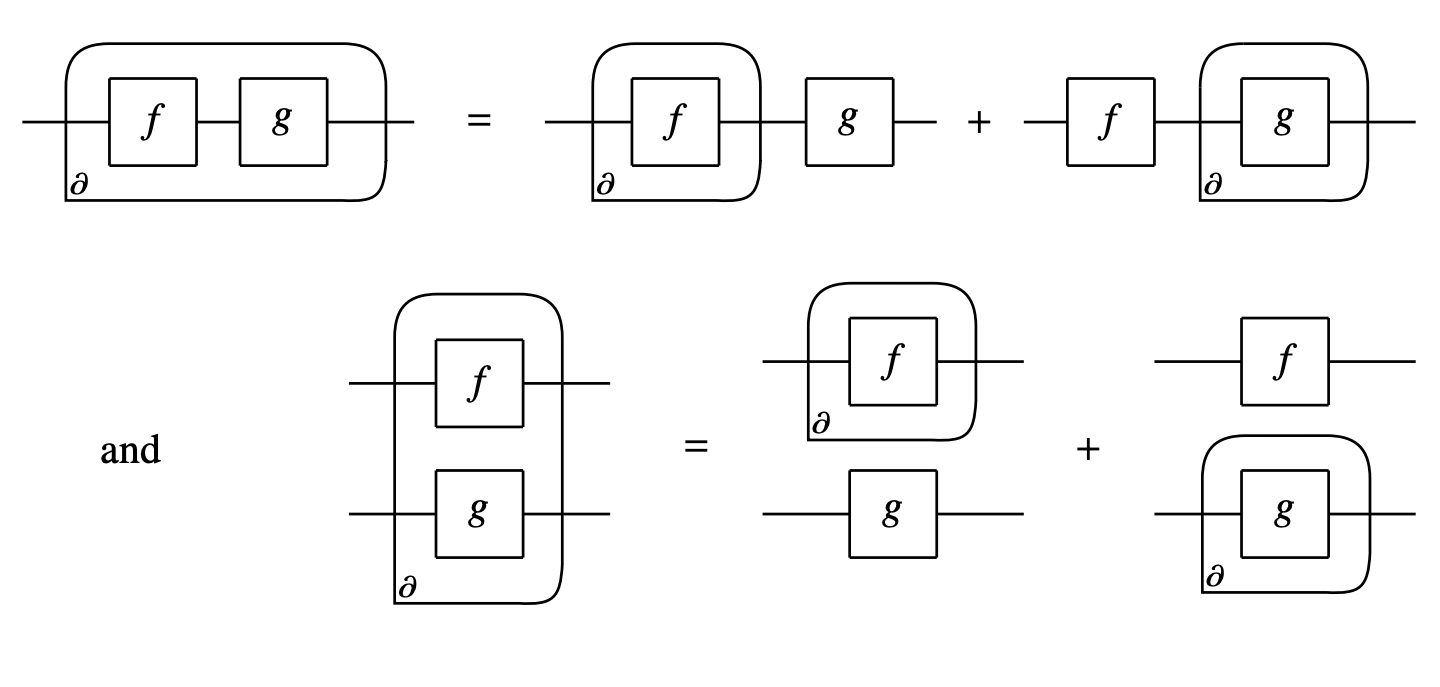

Fix a monoidal signature $\Sigma$ and an interpretation $[\![-]\!] : \mathbf{C}_\Sigma^+ \to \mathbf{Mat}_\mathbb{S}$ for $\mathbb{S}$ a differential rig.

**Definition:** Diagrammatic differentiation is a derivation $\partial$ on $\mathbf{C}_\Sigma^+$ such that
$[\![-]\!] \circ \partial = \partial \circ [\![-]\!]$, i.e. the interpretation of the gradient $[\![\partial d]\!]$ coincides with the gradient of the interpretation $\partial [\![d]\!]$.

## Differentiating ZX

**Definition:** The diagrams of the ZX-calculus with smooth maps $\mathbb{R}^n \to \mathbb{R}$ as phases form a category $\mathbf{ZX}_n = \mathbf{C}_\Sigma$, with interpretation $[\![-]\!]  : \mathbf{ZX}_n \to \mathbf{Mat}_\mathbb{S}$
in matrices over $\mathbb{S} = \mathbb{R}^n \to \mathbb{C}$.

**Remark:** 
For $n = 0$ we get $\mathbf{ZX}_0 = \mathbf{ZX}$ the ZX-calculus
with no parameters.
By currying, any ZX diagram $d \in \mathbf{ZX}_n$ can be seen as a function $d : \mathbb{R}^n \to \text{Ar}(\mathbf{ZX})$.

**Lemma:**
A function $s : \mathbb{R}^n \to \mathbb{C}$ can be drawn as a scalar diagram in $\mathbf{ZX}_n$ iff it is bounded.

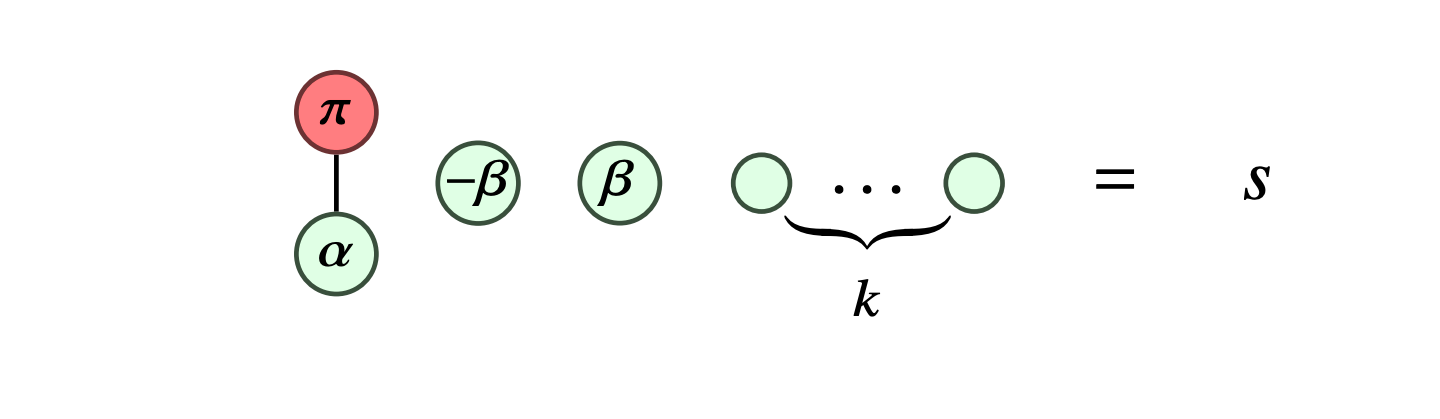

**Lemma:**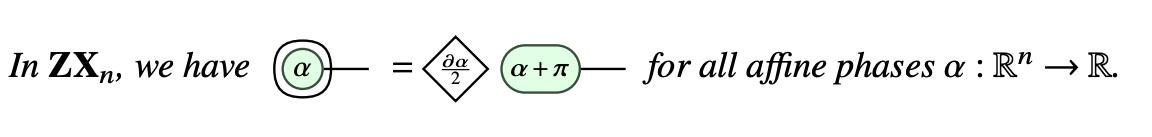

**Theorem:**
The ZX-calculus with affine maps $\mathbb{R}^n \to \mathbb{R}$ as phases admits diagrammatic differentiation.

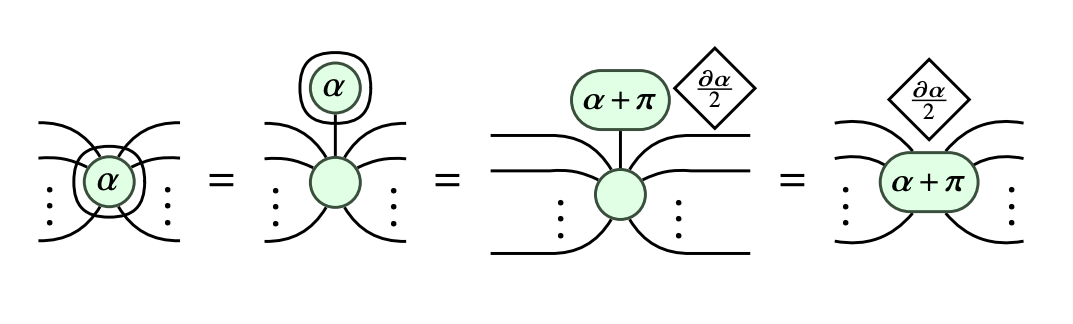

However, ZX with smooth and bounded phases does not admit diagrammatic differentiation. Take e.g. $\alpha : \mathbb{R} \to \mathbb{R}$ with $\alpha(\theta) = \sin \theta^2$, then $\partial \alpha$ is unbounded.

But we can always add more generators.

**Proposition:** For every interpretation $[\![-]\!] : \mathbf{C}_\Sigma^+ \to \mathbf{Mat}_\mathbb{S}$,
there is an extended signature $\Sigma' \supset \Sigma$
and interpretation $[\![-]\!] : \mathbf{C}_{\Sigma'}^+ \to \mathbf{Mat}_\mathbb{S}$
such that $\mathbf{C}_{\Sigma'}^+$ admits digrammatic differentiation.

Or we can work with the algebraic ZX calculus over the rig $\mathbb{S}$ instead.

* Wang, _Completeness of algebraic ZX-calculus over arbitrary commutative rings and semirings_ ([arXiv:1912.01003](https://arxiv.org/abs/1912.01003))

**Theorem:** Diagrammatic derivations on $[\![-]\!] : \mathbf{ZX}_\mathbb{S}^+ \to \mathbf{Mat}_\mathbb{S}$ are in one-to-one correspondance with rig derivations $\partial : \mathbb{S} \to \mathbb{S}$.

**Definition:** A one-parameter unitary group is a unitary matrix $U : n \to n$
in $\mathbf{Mat}_{\mathbb{R} \to \mathbb{C}}$ with $U(0) = \text{id}_n$ and $U(\theta) U(\theta') = U(\theta + \theta')$
for all $\theta, \theta' \in \mathbb{R}$. It is strongly continuous when
$\lim_{\theta \to \theta_0} U(\theta) = U(\theta_0)$ for all $\theta_0 \in \mathbb{R}$.

**Theorem (Stone):** There is a one-to-one correspondance between strongly continuous one-parameter unitary groups and self-adjoint matrices. The bijection is given
explicitly by $U(\theta) = \exp(i \theta H)$ and $H = - i (\partial U)(0)$,
translated in terms of diagrams with bubbles we get:

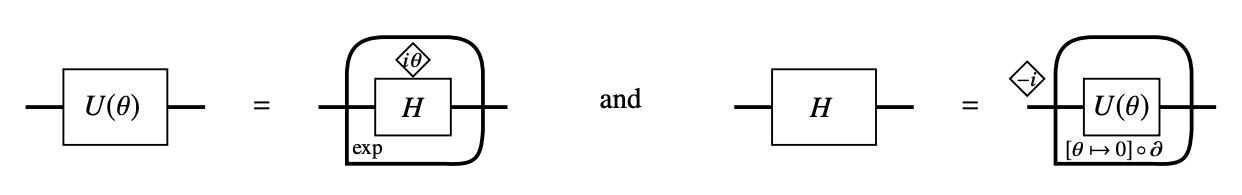

**Example:** Let $d = P(\alpha, ZX)$ be a Pauli gadget then
$d(\theta) = \exp(i \theta h)$ for $h = -i \frac{\partial \alpha}{2} Z \otimes X$.

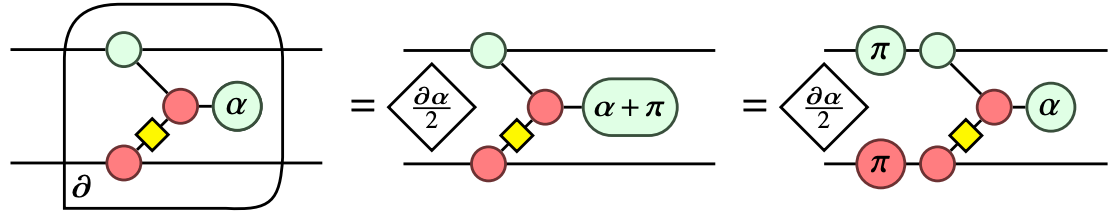

## Differentiating quantum circuits

**Definition:** The category $\mathbf{Channel}_n$ with
* objects $\mathbb{N} \times \mathbb{N}$, classical and quantum dimension of the system,
* arrows $f : (a, b) \to (c, d)$ are given by $a \times b^2 \to c \times d^2$ parametrised complex matrices, i.e. with entries in $\mathbb{R}^n \to \mathbb{C}$,
* composition given by matrix multiplication,
* tensor given by the following diagram:

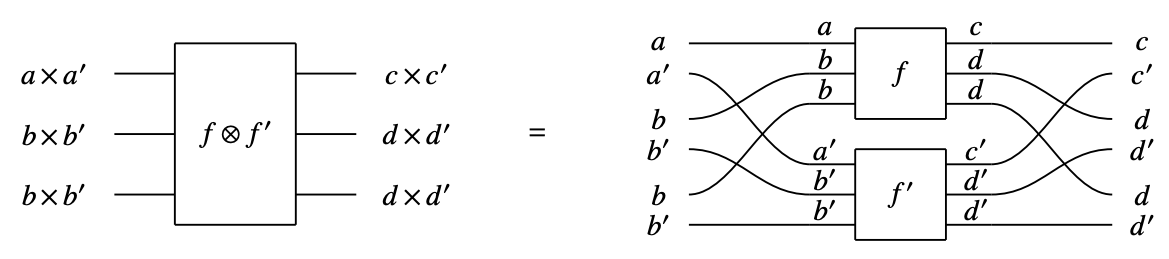

**Definition:** Given a monoidal signature of pure processes $\Sigma$ with one object $\Sigma_0 = \{ q \}$, we extend it to $cq(\Sigma) \supset \Sigma$ with objects $cq(\Sigma)_0 = \{ c, q \}$ and arrows

$$cq(\Sigma)_1 =
\{ \hat{f} : q^{\otimes a} \to q^{\otimes b} \ \vert \ f \in \Sigma_1 \}
+ \{ M : q \to c, \enspace E : c \to q \}$$

Let $\mathbf{C}_{cq(\Sigma)}$ be the free monoidal category it generates,
i.e. arrows are classical-quantum circuits.
We write $cq(\mathbf{ZX}_n)$ for the category of classical-quantum circuits
with parametrised ZX diagrams as pure processes.

**Definition:** Given an interpretation for pure processes $[\![-]\!]
: \mathbf{C}_\Sigma \to \mathbf{Mat}_{\mathbb{R}^n \to \mathbb{C}}$ with $[\![q]\!] = 2$, we define an interpretation for classical-quantum circuits $[\![-]\!] : \mathbf{C}_{cq(\Sigma)} \to \mathbf{Channel}_n$ with
* $[\![c]\!] = (2, 1)$ and $[\![q]\!] = (1, 2)$
* $[\![M]\!] = \sum_{i < 2} \vert i \rangle \langle i, i \vert = [\![E]\!]^T$
* $[\![\hat{f}]\!] = \overline{[\![f]\!]} \otimes [\![f]\!]$



**Remark:** A diagrammatic derivation for pure processes does not in general lift to one for classical-quantum circuits. Indeed, from the product rule we get
$\partial \big( \overline{[\![f]\!]} \otimes [\![f]\!] \big)
\enspace = \enspace \partial \overline{[\![f]\!]} \otimes [\![f]\!]
\ + \ \overline{[\![f]\!]} \otimes \partial [\![f]\!]
\enspace \neq \enspace \overline{[\![\partial f]\!]} \otimes [\![\partial f]\!]$.

**Theorem (Schuld et al.):** For a one-parameter unitary group $U$ with
$U(\theta) = \exp (i \theta H)$, if $H$ has at most two eigenvalues
$\pm r$, then there is a shift $s \in [0, 2 \pi)$ such that

$$\partial f(\theta) = r \big( f(\theta + s) - f(\theta - s) \big)$$

* Schuld et al., _Evaluating analytic gradients on quantum hardware._ ([arXiv:1811.11184](https://arxiv.org/abs/1811.11184))

**Corollary:** Classical-quantum circuits $cq(\mathbf{ZX}_n)$ with parametrised ZX diagrams as pure processes admit diagrammatic differentiation.

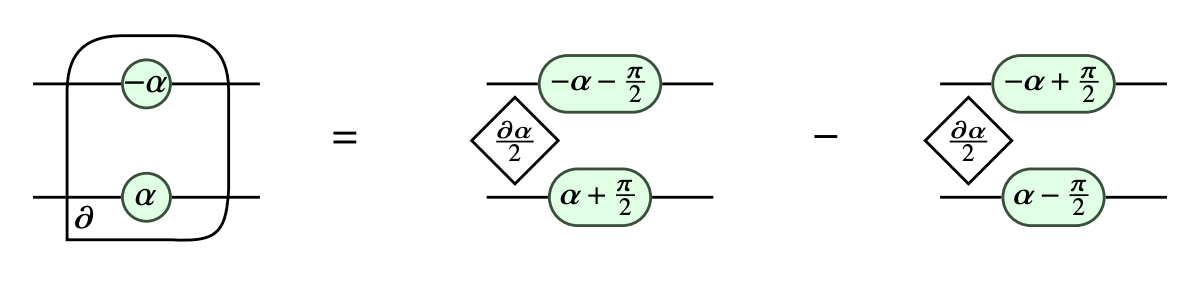

**Note:** We need a diagram for the $-1$ scalar, or formal sums with minus signs, a.k.a. enrichment in Abelian groups.

**Example:**
* Havlicek et al., _Supervised learning with quantum enhanced feature spaces._ ([arXiv:1804.11326](https://arxiv.org/abs/1804.11326))

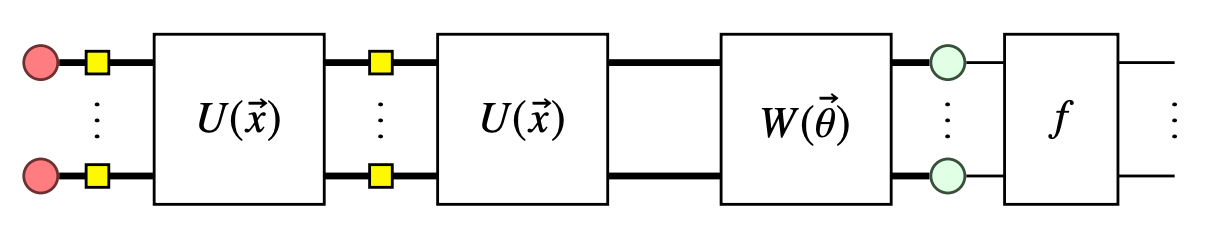

## Bubbles and the chain rule

**Definition:** A bubble $\beta$ for a monoidal category $\mathbf{C}$ is given by:
* a pair of operators on objects $\beta_\text{dom}, \beta_\text{cod} : \text{Ob}(\mathbf{C}) \to \text{Ob}(\mathbf{C})$,
* an operator on homsets $\beta : \prod_{x, y}
\mathbf{C}(x, y) \to \mathbf{C}(\beta_\text{dom}(x), \beta_\text{cod}(y))$

**Proposition:** Given a monoidal signature $\Sigma$, the signature of the free monoidal category with bubbles is given by a union $B(\Sigma) = \bigcup_{n \in \mathbb{N}} B(\Sigma, n)$ where the
signature of $(\leq n)$-nested bubbles $B(\Sigma, n)$ is defined by
induction:
$$
\beta(\Sigma, 0) \enspace = \enspace \Sigma \qquad \text{and} \qquad
\beta(\Sigma, n + 1) \enspace = \enspace \big\{\beta(d) : \beta_\text{dom}(x) \to \beta_\text{cod}(y) \enspace \vert \enspace d : x \to y \in \mathbf{C}_{B(\Sigma, n)} \big\}$$

**Examples:**

* Penrose and Rindler. _Spinors and Space-Time: Volume 1._ (1984)

![covariant derivative](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Penrose_covariant_derivate.svg/617px-Penrose_covariant_derivate.svg.png)

* Melliès, _Functorial boxes in string diagrams_, (2006)
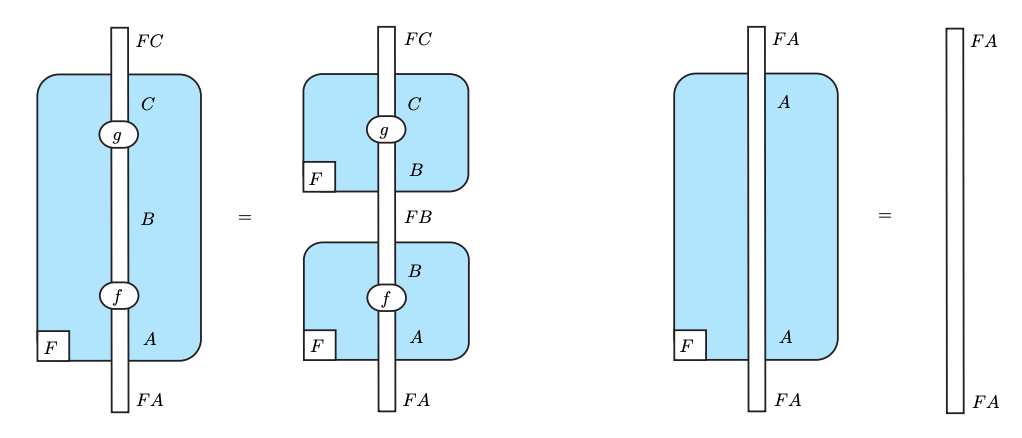

* Peirce, _Prolegomena to an apology of pragmaticism_ (1906)

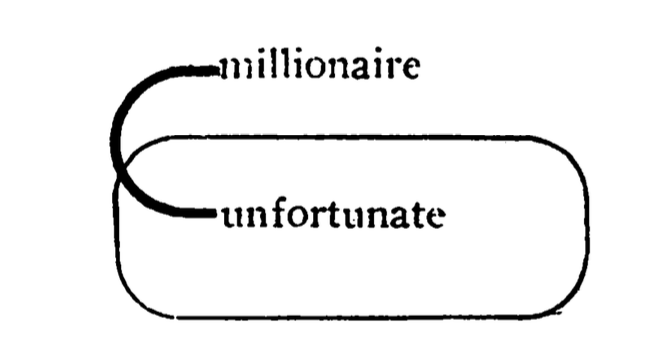

* Haydon and Sobocinski, _Compositional Diagrammatic First-Order Logic_ (2020)

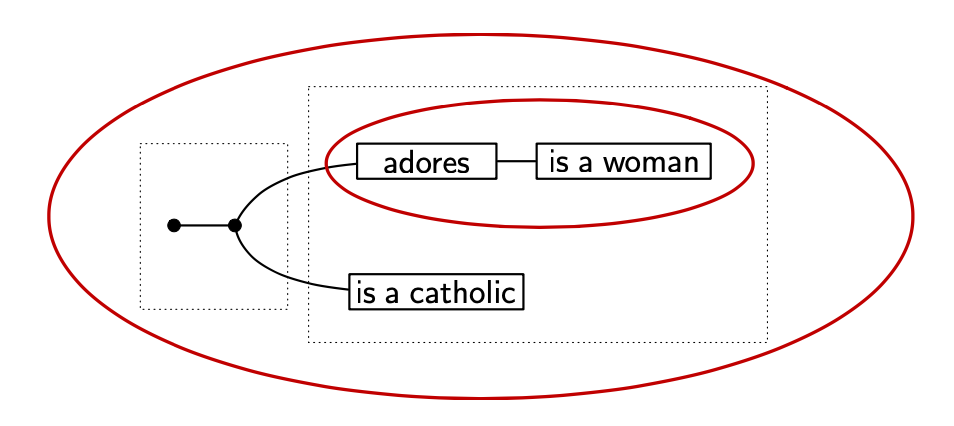

* Any rig-valued function $\beta : \mathbb{S} \to \mathbb{S}$ yields a bubble on $\mathbf{Mat}_\mathbb{S}$ given by pointwise application. Gradient bubbles $\partial : \mathbb{S} \to \mathbb{S}$ are a special case. Negation $\neg : \mathbb{B} \to \mathbb{B}$ as well.

* Non-linear activation functions in machine learning, e.g. $\sigma(x) = 1 / (1 + e^{-x})$. Thus, we can draw a neural network as a bubbled diagram in $\mathbf{Mat}_\mathbb{R}$: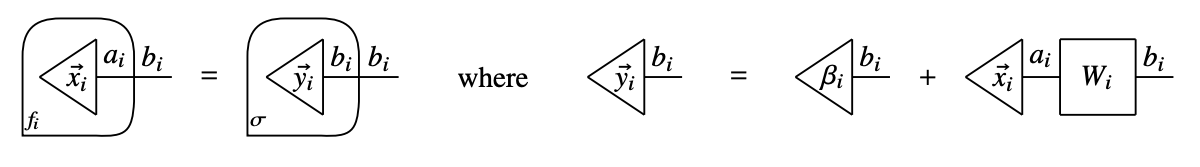

When the bubble $\beta$ has a derivative $\partial \beta$, we may define the gradient of bubbled diagrams with the chain rule $\partial(\beta(f)) = (\partial \beta)(f) \times \partial f$.

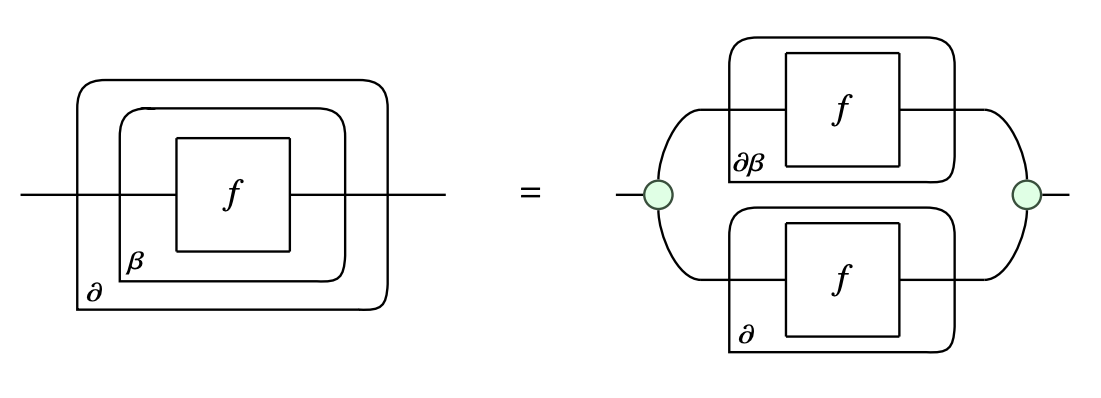

**Note:** We encode the multiplication as pre/post composition with a Frobenius algebra.

**Application:** Classical post-processing for quantum algorithms.

## Demo time!

https://github.com/discopy/discopy

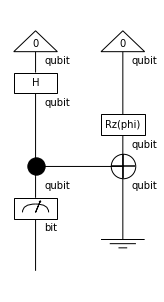

Channel(dom=CQ(), cod=C(Dim(2)), array=[0.5*exp(-1.0*I*pi*phi)*exp(1.0*I*pi*conjugate(phi)),
 0.5*exp(-1.0*I*pi*phi)*exp(1.0*I*pi*conjugate(phi))])

In [25]:
from sympy.abc import phi
from discopy.quantum import (
    Id, H, Rz, CX, Ket, Measure, Discard)
from discopy import drawing

circuit = Ket(0, 0) >> H @ Rz(phi) >> CX >> Measure() @ Discard()
circuit.draw(figsize=(2, 4))
circuit.eval()

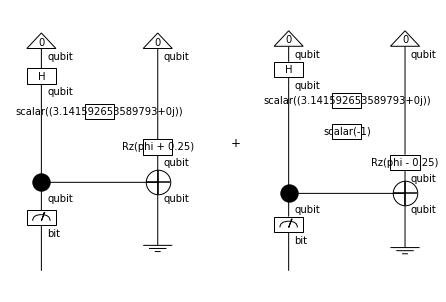

In [26]:
circuit.grad(phi).draw()